<a href="https://colab.research.google.com/github/acinaction/Arsh_Chauhan_MA_Assign1_240196/blob/main/Bitcoin_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import math

In [2]:
data=yf.download("BTC-USD",start='2018-01-01',end='2023-01-01')
data.columns=data.columns.get_level_values(0)
dd2=yf.download("BTC-USD",start='2018-01-01',end='2023-01-01')
dd2.columns=dd2.columns.get_level_values(0)
dd2['No_of_Stocks']=0
dd2['Portfolio_Value']=0
dd2['Profit_From_Initial_Capital']=0

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()
data1=data.copy()
data2=data.copy()

In [4]:
rfr=yf.download("^TNX",start='2018-01-01',end='2023-01-01')
rfr.columns=rfr.columns.get_level_values(0)
rfr.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
def calculate_macd(data):
  data['short_period']=data['Close'].ewm(span=12,adjust=False).mean()
  data['long_period']=data['Close'].ewm(span=26,adjust=False).mean()
  data['macd']=data['short_period']-data['long_period']
  data['signal_macd']=data['macd'].ewm(span=9,adjust=False).mean()
  data['hist_value']=data['macd']-data['signal_macd']
  data['macd_signal']=0
  for i in range(1,len(data)):
    if data['hist_value'].iloc[i]>0 and data['hist_value'].iloc[i-1]<0:
      data['macd_signal'].iloc[i]=1
    if data['hist_value'].iloc[i]<0 and data['hist_value'].iloc[i-1]>0:
      data['macd_signal'].iloc[i]=-1
  current = data['macd_signal'].iloc[0]
  for i in range(1,len(data)):
    if current==1:
      if data['macd_signal'].iloc[i]==1:
        data['macd_signal'].iloc[i]=0
      elif data['macd_signal'].iloc[i]==-1:
        current=0
    elif current==-1:
      if data['macd_signal'].iloc[i]==-1:
        data['macd_signal'].iloc[i]=0
      elif data['macd_signal'].iloc[i]==1:
        current=0
    elif current==0:
      if data['macd_signal'].iloc[i]==1:
        current=1
      elif data['macd_signal'].iloc[i]==-1:
        current=-1
  return data

In [6]:
def calculate_RSI(data):
    period=14
    data['price_change']=data['Close']-data['Close'].shift(1)
    data['gain']=data['price_change'].apply(lambda x:x if x > 0 else 0)
    data['loss']=data['price_change'].apply(lambda x:abs(x) if x < 0 else 0)
    data['avg_gain']=data['gain'].rolling(window=period,min_periods=1).mean()
    data['avg_loss']=data['loss'].rolling(window=period,min_periods=1).mean()
    data['RS']=data['avg_gain']/data['avg_loss']
    data['RSI']=100-(100/(1+data['RS']))
    data['rsi_signals']=0
    for i in range(len(data)):
      if(data['RSI'][i]<35) :
        data['rsi_signals'][i]=1
      elif(data['RSI'][i]>65) :
        data['rsi_signals'][i]=-1
    return data

In [7]:
def strategy(data):
  data=calculate_macd(data)
  data=calculate_RSI(data)

  signal = []
  for i in range(0,len(data)):
    if (data['macd'].iloc[i]>data['signal_macd'].iloc[i]) and (data['rsi_signals'].iloc[i]==1):
      signal.append(1)
    elif (data['macd'].iloc[i]<data['signal_macd'].iloc[i]) and (data['rsi_signals'].iloc[i]==-1):
      signal.append(-1)
    else:
      signal.append(0)
  data['signals']=signal
  current = 0
  for i in range(len(data)):
        if current == 1:
            if data['signals'].iloc[i] == 1:
                data['signals'].iloc[i] = 0
            elif data['signals'].iloc[i] == -1:
                current = 0
        elif current == -1:
            if data['signals'].iloc[i] == -1:
                data['signals'].iloc[i] = 0
            elif data['signals'].iloc[i] == 1:
                current = 0
        elif current==0:
            if data['signals'].iloc[i] == 1:
                current = 1
            elif data['signals'].iloc[i] == -1:
                current = -1
  num1 = 0
  num2 = 0
  for i in range(len(data)):
        if data['signals'].iloc[i] == 1:
            num1 += 1
        elif data['signals'].iloc[i] == -1:
            num2 += 1

  ct = 0
  j = 0
  k = 0
  if num1 < num2:
        while ct < 1:
            if data['signals'].iloc[len(data) - j - 1] == -1:
                data['signals'].iloc[len(data) - j - 1] = 0
                break
            j += 1
  elif num1 > num2:
        while ct < 1:
            if data['signals'].iloc[len(data) - k - 1] == 1:
                data['signals'].iloc[len(data) - k - 1] = 0
                break
            k += 1
  return data

In [8]:
data2=strategy(data2)

Streaming output truncated to the last 5000 lines.
  data['rsi_signals'][i]=-1
<ipython-input-6-6a65649b6e9b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(data['RSI'][i]<35) :
<ipython-input-6-6a65649b6e9b>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif(data['RSI'][i]>65) :
<ipython-input-6-6a65649b6e9b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rsi_signals'][i]=-1
<ipython-input-6-6a65649b6e9b>:15: Futu

In [9]:
def calculate(data9,dd1):

  balance=1000000 #Capital for Investing.
  capital=1000000
  stop_loss=14 # Percentage for stop loss
  take_profit=14  # Percentage for take profit
  multiplier=7 # Multiplier for Average True Range Stop Loss
  maxDrawdownLimit=25 # Drawdown Limit to Exit a Trade

  no_of_stocks=0
  position=0
  num_stocks=[] #List of no. of stocks hold in each trade
  returns=[] #List containing return from each trade
  capitall=[] #List containing capital after each trade
  remains=[] #List containing not invested capital for each trade
  remainss=[] #List containing not invested capital for each trade
  max__drawdown=[] #List containing Max Drawdown for each trade
  max__dip=[] #List containing Max Dip for each trade
  pv=[]
  j=0
  l=0
  pf=[]
  trades=[]
  rfr1=[]
  buy_signals=[]
  sell_signals=[]
  tsll=[]
  ttpl=[]
  drawdown2=[]

  twd1=pd.DataFrame(columns=['Entry Index','Exit Index','Trade Duration','Entry Price','Exit Price','Returns for Trade in %','Type of Trade','Trade Close By','No. of Stocks Traded','Profit/Loss','Capital'])

  for i in range(len(data9)):
    if(capital>0):
      if(position==1):
        slp=twd1['Entry Price'].iloc[j]-(multiplier*data9['ATR'].iloc[i]) # Stop Loss price for Long Trades usnig ATR
      elif(position==-1):
        slp=twd1['Entry Price'].iloc[j]+(multiplier*data9['ATR'].iloc[i]) # Stop Loss price for Short Trades using ATR
      # Taking a Long position
      if data9['signals'].iloc[i]==1 and position==0:
          no_of_stocks=int(capital/data9['Close'].iloc[i])
          num_stocks.append(no_of_stocks)
          price=data9['Close'].iloc[i]
          remain1=capital-no_of_stocks*price
          remains.append(remain1)
          #Filling different columns of the DataFrame twd.
          new_row={'Entry Index':i,'Exit Index':0,'Trade Duration':0,'Entry Price':price,'Returns for Trade in %':0,'Type of Trade':"long",
                     'Trade Close By':"none", 'Max Drawdown for Trade':0, 'Max Dip for Trade':0, 'No. of Stocks Traded':no_of_stocks,'Profit/Loss':0,'Capital':0}
          twd1.loc[len(twd1)]=new_row
          position=1
          trades.append(i)

      # Long position with stop loss condition
      elif (position==1 and ((max__drawdown2>=maxDrawdownLimit) or (((data9['Close'].iloc[i]*no_of_stocks)+remain1)<=tsl) or (data9['Close'].iloc[i]<=slp))):
          if((((data9['Close'].iloc[i]*no_of_stocks)+remain1)<=tsl)):
            twd1['Trade Close By'].iloc[j]="trailing_stop_loss"
          elif(max__drawdown2>=maxDrawdownLimit):
            twd1['Trade Close By'].iloc[j]="Max Drawdown Limit"
          else:
            twd1['Trade Close By'].iloc[j]="ATR_stop_loss"
          returns1=(((data9['Close'].iloc[i]-price)/price)*100)
          capital=((data9['Close'].iloc[i]*no_of_stocks)+remain1)
          net=twd1['No. of Stocks Traded'].iloc[j]*((data9['Close'].iloc[i]-twd1['Entry Price'].iloc[j]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=-1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)


      # Taking a Short position
      elif data9['signals'].iloc[i]==-1 and position==0:
          no_of_stocks=int(capital/data9['Close'].iloc[i])
          num_stocks.append(no_of_stocks)
          price=data9['Close'].iloc[i]
          remain1=capital-no_of_stocks*price
          remains.append(0)
          #Filling different columns of the DataFrame twd.
          new_row={'Entry Index':i,'Exit Index':0,'Trade Duration':0,'Entry Price':price,'Returns for Trade in %':0,'Type of Trade':"short",
                     'Trade Close By':"none", 'Max Drawdown for Trade':0, 'Max Dip for Trade':0, 'No. of Stocks Traded':no_of_stocks,'Profit/Loss':0,'Capital':0}
          twd1.loc[len(twd1)]=new_row
          position=-1
          trades.append(i)

      # Short position with trailing take profit condition or stop loss condition
      elif (position==-1 and ((((data9['Close'].iloc[i]*no_of_stocks)+remain1)>=ttp) or (data9['Close'].iloc[i]>=slp) or (max__drawdown2>=maxDrawdownLimit))):
          if((((data9['Close'].iloc[i]*no_of_stocks)+remain1)>=ttp)):
            twd1['Trade Close By'].iloc[j]="trailing_take_profit"
          elif(max__drawdown2>=maxDrawdownLimit):
            twd1['Trade Close By'].iloc[j]="Max Drawdown Limit"
          else:
            twd1['Trade Close By'].iloc[j]="ATR_stop_loss"
          returns1=(((price-data9['Close'].iloc[i])/price)*100)
          capital=capital+((price-data9['Close'].iloc[i])*no_of_stocks)
          net=twd1['No. of Stocks Traded'].iloc[j]*((twd1['Entry Price'].iloc[j]-data9['Close'].iloc[i]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)

      # Long position with sell signal
      elif data9['signals'].iloc[i]==-1 and position==1:
          returns1=(((data9['Close'].iloc[i]-price)/price)*100)
          capital=((data9['Close'].iloc[i]*no_of_stocks)+remain1)
          net=twd1['No. of Stocks Traded'].iloc[j]*((data9['Close'].iloc[i]-twd1['Entry Price'].iloc[j]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Trade Close By'].iloc[j]="signal"
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=-1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)

      # Short position with buy signal condition
      elif data9['signals'].iloc[i]==1 and position==-1:
          returns1=(((price-data9['Close'].iloc[i])/price)*100)
          capital=capital+((price-data9['Close'].iloc[i])*no_of_stocks)
          net=twd1['No. of Stocks Traded'].iloc[j]*((twd1['Entry Price'].iloc[j]-data9['Close'].iloc[i]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Trade Close By'].iloc[j]="signal"
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)

      dd1['No_of_Stocks'].iloc[i]=no_of_stocks
      if(no_of_stocks!=0):
        if(position==1):
          dd1['Portfolio_Value'].iloc[i]=(no_of_stocks*data9['Close'].iloc[i])+remain1
        else:
          dd1['Portfolio_Value'].iloc[i]=capital+(no_of_stocks*(price-data9['Close'].iloc[i]))
      else:
        dd1['Portfolio_Value'].iloc[i]=capital
      dd1['Profit_From_Initial_Capital'].iloc[i]=((dd1['Portfolio_Value'].iloc[i]-balance)/balance)*100
      if(position==1):
        max2=dd1['Portfolio_Value'].iloc[twd1['Entry Index'].iloc[j]]
        for k in range(twd1['Entry Index'].iloc[j],i+1):
          pf.append(dd1['Portfolio_Value'].iloc[k])
          maxx=max(pf)
          portfolio2=dd1['Portfolio_Value'].iloc[k]
          if (portfolio2>max2):
            max2=portfolio2
          drawdown2.append(((max2-portfolio2)/portfolio2)*100)
        max__drawdown2=(max(drawdown2))
        tsl=(1-(stop_loss/100))*maxx
        tsll.append(tsl)
        pf.clear()
        drawdown2.clear()
      if(position==-1):
        max2=dd1['Portfolio_Value'].iloc[twd1['Entry Index'].iloc[j]]
        for k in range(twd1['Entry Index'].iloc[j],i+1):
          pf.append(dd1['Portfolio_Value'].iloc[k])
          minn=min(pf)
          portfolio2=dd1['Portfolio_Value'].iloc[k]
          if (portfolio2>max2):
            max2=portfolio2
          drawdown2.append(((max2-portfolio2)/portfolio2)*100)
        max__drawdown2=(max(drawdown2))
        ttp=(1+(take_profit/100))*minn
        ttpl.append(ttp)
        pf.clear()
        drawdown2.clear()
      if(position==0 or position==-1):
        tsll.append(dd1['Portfolio_Value'].iloc[i])
      if(position==0 or position==1):
        ttpl.append(dd1['Portfolio_Value'].iloc[i])


  if(twd1['Exit Index'].iloc[len(twd1)-1]==0):
    data9['signals'].iloc[twd1['Entry Index'].iloc[len(twd1)-1]]=0
    twd1=twd1.drop(len(twd1)-1,axis=0)
    trades.pop()
  for i in range(len(data9)):
    if(data9['signals'].iloc[i]==1):
      buy_signals.append(i)
    elif(data9['signals'].iloc[i]==-1):
      sell_signals.append(i)
  #Calculating Maximum Drawdown and Maximum Dip for each Trade.
  dd1['Current Position']=0
  a=0
  for i in range(0,((int(len(trades)/2)))*2,2):
    drawdown=[]
    index1=trades[i]
    index2=trades[i+1]
    stocks=num_stocks[a]
    remain=remains[a]
    max1=dd1['Portfolio_Value'].iloc[index1]
    min1=dd1['Portfolio_Value'].iloc[index1]
    for j in range(index1,index2+1):
      portfolio=dd1['Portfolio_Value'].iloc[j]
      if (portfolio>max1):
        max1=portfolio
      if (portfolio<min1):
        min1=portfolio
      drawdown.append(((max1-portfolio)/portfolio)*100)
      # rfr1.append(data5['Close'].iloc[j])
    max__drawdown.append(max(drawdown))
    max__dip.append(((dd1['Portfolio_Value'].iloc[index1]-min1)/(dd1['Portfolio_Value'].iloc[index1]))*100)
    a=a+1

  twd1['Max Drawdown for Trade']=max__drawdown
  twd1['Max Dip for Trade']=max__dip


  #Code

  #Benchmark Return and Total Returns
  num=int(balance/data9['Close'].iloc[0])
  remain_=balance-num*data9['Close'].iloc[0]
  br=((((num*data9['Close'].iloc[len(data9)-1])+remain_)-balance)/balance)*100
  print("Benchmark Return is:",br,"%")

  #Trades
  print("Number of Close Trades are:",int(len(trades)/2))
  wt=0
  lt=0
  total_returns=0
  for i in range(len(twd1)):
    if(twd1['Returns for Trade in %'].iloc[i]>0):
      wt+=1
    elif(twd1['Returns for Trade in %'].iloc[i]<0):
      lt+=1
    total_returns+=twd1['Returns for Trade in %'].iloc[i]
  print("Number of Winning Trades are:",wt)
  print("Number of Losing Trades are:",lt)
  print("Total Returns of Strategy:",(dd1['Profit_From_Initial_Capital'].iloc[len(dd1)-1]),"%")
  #Gross Profit and Net Profit
  gp=(balance*(dd1['Profit_From_Initial_Capital'].iloc[len(dd1)-1]))/100
  print("Gross Profit is:",gp)
  #Max Drawdown
  maxDrawdown=max(max__drawdown)
  print("Maximun Drawdown is:",maxDrawdown,"%")
  #Avg. Drawdown
  avgDrawdown=twd1['Max Drawdown for Trade'].mean()
  print("Average Drawdown is:",avgDrawdown,"%")
  #Max Dip
  maxDip=max(twd1['Max Dip for Trade'])
  print("Maximun Dip is:",maxDip,"%")
  #Avg. Dip
  avgDip=twd1['Max Dip for Trade'].mean()
  print("Average Dip is:",avgDip,"%")
  holding_time=twd1['Trade Duration']
  print("Maximum Holding Time:",max(holding_time))
  print("Average Holding Time:",sum(holding_time)/len(holding_time))
  #Sharpe Ratio and Sortino Ratio
  returns1=twd1['Returns for Trade in %']
  negative_returns1=[]
  rfr1.clear()
  rfr1=rfr['Close']
  # entry1=trades[0]
  # exit1=trades[len(trades)-1]
  # for i in range(entry1,exit1+1):
  #   rfr1.append(data5['Close'].iloc[i])
  for i in range(len(twd1)):
    if(twd1['Returns for Trade in %'].iloc[i]<0):
      negative_returns1.append(twd1['Returns for Trade in %'].iloc[i])
  mean_rfr1=sum(rfr1)/len(rfr1)
  mean_returns1=returns1.mean()
  mean_neg_returns1=sum(negative_returns1)/len(negative_returns1)
  array1=np.array(negative_returns1)
  std_neg_returns1=np.std(array1,ddof=1)
  std_returns1=returns1.std()
  y=((math.sqrt(252)))
  sharpeRatio1=y*((mean_returns1-mean_rfr1)/std_returns1)
  sortinoRatio1=y*((mean_returns1-mean_rfr1)/std_neg_returns1)
  print("Calculated Sharpe Ratio of the strategy is:",sharpeRatio1)
  print("Calculated Sortino Ratio of the strategy is:",sortinoRatio1)
  return twd1,dd1,buy_signals,sell_signals,tsll,ttpl

In [10]:
dataa=data2.copy()
dataa['TR'] = np.maximum(dataa['High'] - dataa['Low'],
                            np.maximum(abs(dataa['High'] - dataa['Close'].shift(1)),
                                       abs(dataa['Low'] - dataa['Close'].shift(1))))
dataa['ATR'] = dataa['TR'].rolling(window=14).mean()
ddf=dd2.copy()
a1,a2,buy1,sell1,tsll1,ttpl1=calculate(dataa,ddf)

Streaming output truncated to the last 5000 lines.
<ipython-input-9-5c6c2837dc95>:158: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dd1['Profit_From_Initial_Capital'].iloc[i]=((dd1['Portfolio_Value'].iloc[i]-balance)/balance)*100
<ipython-i

Benchmark Return is: 21.09916005859375 %
Number of Close Trades are: 12
Number of Winning Trades are: 5
Number of Losing Trades are: 7
Total Returns of Strategy: 88.06470407714843 %
Gross Profit is: 880647.0407714844
Maximun Drawdown is: 32.17671548241901 %
Average Drawdown is: 15.126549508539606 %
Maximun Dip is: 23.457158996535128 %
Average Dip is: 8.51823248962841 %
Maximum Holding Time: 79
Average Holding Time: 21.25
Calculated Sharpe Ratio of the strategy is: 1.0443147524431333
Calculated Sortino Ratio of the strategy is: 4.672529668593405


<ipython-input-9-5c6c2837dc95>:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd1['No_of_Stocks'].iloc[i]=no_of_stocks
<ipython-input-9-5c6c2837dc95>:155: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origina

<ipython-input-11-e40aba4f34f5>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dataa.index[buy1], dataa['Close'][buy1], '^', markersize=10, color='g', label='Buy Signal')
<ipython-input-11-e40aba4f34f5>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dataa.index[sell1], dataa['Close'][sell1], 'v', markersize=10, color='r', label='Sell Signal')


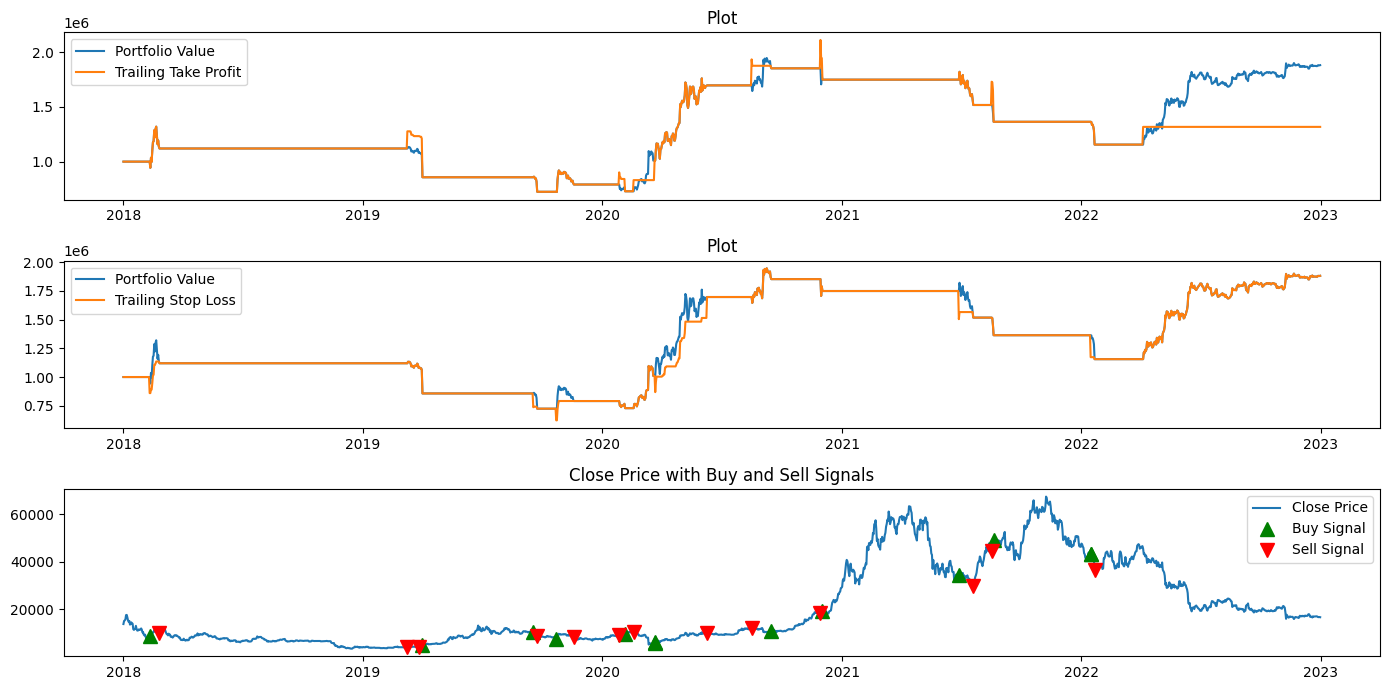

In [11]:
plt.figure(figsize=(14, 7))

# Plot for Portfolio Value and TTP
plt.subplot(3, 1, 1)
plt.plot(dataa.index, a2['Portfolio_Value'], label='Portfolio Value')
plt.plot(dataa.index, ttpl1, label='Trailing Take Profit')
plt.title('Plot')
plt.legend()

# Plot for Portfolio Value and TSL
plt.subplot(3, 1, 2)
plt.plot(dataa.index, a2['Portfolio_Value'], label='Portfolio Value')
plt.plot(dataa.index, tsll1, label='Trailing Stop Loss')
plt.title('Plot')
plt.legend()

# Plot for Close Price with Buy and Sell Signals
plt.subplot(3, 1, 3)
plt.plot(dataa.index, dataa['Close'], label='Close Price')

# ✅ Fix: Ensure correct x-axis for buy/sell markers
plt.plot(dataa.index[buy1], dataa['Close'][buy1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(dataa.index[sell1], dataa['Close'][sell1], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('Close Price with Buy and Sell Signals')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
a1

,Entry Index,Exit Index,Trade Duration,Entry Price,Exit Price,Returns for Trade in %,Type of Trade,Trade Close By,No. of Stocks Traded,Profit/Loss,Capital,Max Drawdown for Trade,Max Dip for Trade
0,40,55,15,8621.900391,9664.730469,12.095130,long,trailing_stop_loss,115,119925.458984,1.119925e+06,17.856681,5.657197
1,433,456,23,3951.599854,4879.877930,-23.491196,short,trailing_take_profit,283,-262702.695557,8.572228e+05,32.176715,23.457159
2,625,631,6,10198.248047,8620.566406,-15.470124,long,trailing_stop_loss,84,-132525.257812,7.246975e+05,19.077102,15.459839
3,660,687,27,7514.671875,8206.145508,9.201648,long,trailing_stop_loss,96,66381.468750,7.910790e+05,16.328920,0.280611
4,756,765,9,8909.819336,9613.423828,-7.896956,short,trailing_take_profit,88,-61917.195312,7.291618e+05,8.491558,7.826930
5,778,810,32,10141.996094,6185.066406,39.015295,short,signal,71,280942.007812,1.010104e+06,8.639847,0.000000
6,811,890,79,5830.254883,9795.700195,68.014956,long,signal,173,686022.039062,1.696126e+06,15.675691,0.000000
7,958,988,30,11892.803711,10796.951172,9.214417,short,signal,142,155611.060547,1.851737e+06,5.452835,3.027311
8,1063,1066,3,18177.484375,19201.091797,-5.631183,short,trailing_take_profit,101,-103384.349609,1.748353e+06,8.577397,7.899800
9,1274,1296,22,34434.335938,29807.347656,-13.437135,long,trailing_stop_loss,50,-231349.414062,1.517003e+06,19.975007,13.232424


In [13]:
a2=a2.drop('Current Position',axis=1)
a2

Price,Close,High,Low,Open,Volume,No_of_Stocks,Portfolio_Value,Profit_From_Initial_Capital
Date,,,,,,,,
2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000,0,1.000000e+06,0.000000
2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192,0,1.000000e+06,0.000000
2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160,0,1.000000e+06,0.000000
2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744,0,1.000000e+06,0.000000
2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072,0,1.000000e+06,0.000000
...,...,...,...,...,...,...,...,...
2022-12-27,16717.173828,16959.845703,16642.072266,16919.291016,15748580239,25,1.876405e+06,87.640510
2022-12-28,16552.572266,16768.169922,16497.556641,16716.400391,17005713920,25,1.880520e+06,88.052014
2022-12-29,16642.341797,16651.755859,16508.683594,16552.322266,14472237479,25,1.878276e+06,87.827590
